# D208 Task 1 Performance Assessment
Vincent Taylor

## Part 1: Research Question

- (A1): The research question that I will be analyzing is what factors  contribute most to `tenure`. This question is the same from my D207 assessment as I believe that delving deeper into this specific question would create value for our organization. The benefits associated with this analysis are being able to understand factors that contribute to customer tenure. By finding the factors that contribute we can then potentially identify specific products or create incentives in order to maintain more long-term customers. As previously discussed in my prior markup finding attributes that predict tenure can lead to a direct cost savings by not having to focus as heavily on marketing to new customers.

- Hypothesis 
     - No features contrinute to customer `tenure`
     - Features do contribute to customer `tenure`

## Goals of Analysis
- (A2): The primary goal of this analysis is to identify which independent variables in the dataset show correlation with our dependent variable. We will look into all of the variables in the dataset with the goal of trying to figure out which ones could have an impact on tenure. From there we will take those variables and prepare them for our linear regression modeling to determine if it could move the needle in identifying more long-term cusomters.The end goal is to be able to predict when a customer may consider churning and have customer service follow up with them. This  will directly contribute to the long-term customers will enhance our customer service while also trying to tailor a products in order to keep their business. Being able to identify factors also allows us to allocate funding in order to expand our competitive advantage. 

---

## Part II Method Justification

#### Assumptions of multiple linear regression model
- (B1): The four assumptions are as follows; 

- 1. A linear relationship needs to exist between the response variable and the independent varibales. A linear relationship is defind in regression analysis with python as the predictor increasing or decreasing at the same rate as our response variable. For this analysis my independent variables x1, x2, x3... will need to be able to have a linear relationship with my dependent y variable `tenure`.

- 2. The observations must be independent of each other, meaning that when there should be no relation exists between the variables. IF this is not met it can led to incorrect p-values and unreliable statistical estimates. Violating this could further lead to the introduction of bias into the model. 

- 3. The reisduals must be normally distributed, this is key for statistical modeling due to the fact that all models requre normal variables. However in using most real world data this is highly uncommon.

- 4. Equal variances (Homoscedasticity): The variance of errors/spread needs to be constant across all independent variables; x1, x2, x3. Heteroscedasticity, is the opposite and can directly affect the model predictions.

---

#### Benefits of using Python in support of the analysis
- (B2) I chose to use Python to perform this analysis due to its ability to handle data analysis as well as it's ease of use when it comes to visualizing and performing statitsitcal modeling. It's focus on simplicity makes it an easy programming language to learn, while also creating code that is easily interpretable. Importing libraries like Numpy and Pandas makes it easier to handle data manipulation and analysis more efficiently.Matplotlib and Seaborn are helpful and make data visualizations easier. Scipy makes it super easy to perform statistical calculations and helps with checking for multicollinearity to ensure the MLR model is as accurate as possible.Lastly Scikit learn is helpful when trying to build machine learning models while also helping with multicollinearity which further strengthens the reliability of the model, while statsmodels is used to also explore data and perform statistical tests.

#### Why MLR is an appropriate technique for this analysis.
- (B3)  Multiple linear regression is for modeling reltionships between multiple independent variables and a single dependent variable. With customer `tenure` being our dependent variable we can use other attributes in order to understand more about how other independent variables affect our dependent variable. Using MLR also allows us to make predictions about the dependent variable using independent variables within a dataset, while also being able to get insight to which variables are the most statistically significant to the model by being able to see the p-values and coefficients in the model. MLR regression works due to the charactersitics of the data and due to the number of independent variables that we have. Methods like Simple Linear regression or polynomial regression would not allow us to consider as many variablesas we are for this analysis. Moreover since `tenure` is a continuous variable we would not be able to other types of analysis such as logistic regression, which is used when the dependent variable is binary or categorical in nature. Furthermore MLR would not be suitable if the relationship between the predictors and dependent variable is not linear and could lead to innacurate results. MLR is also not suitable when using independent variables that are highly correlated to each other and could lead to the model having issues with multicollinearity.

---

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest, f_regression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.datasets import make_regression


# Disabling warinings
import warnings
warnings.filterwarnings('ignore')

# import data from csv
df = pd.read_csv('churn_clean.csv', index_col=0)
df.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,172.455519,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.632554,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [2]:
df.shape

(10000, 49)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income             

In [4]:
if df.isnull().sum().sum() == 0:
    print("No null values.")
else:
    print("Null values exist!")

No null values.


## Part III

#### Describe Data Cleaning Goals
- (C1): My goals for the data cleaning process is to; fix improperly formatted values, checking for duplicates, null values and outliers. For treatment of outliers I plan to scale features using RobustScaler. This will help ensure that the model is standardized. RobustScaler uses median and inquartile ranges to handle outliers unlike StandardScaler which uses the mean and variance for outliers and would not be a suitable scaling method in this analysis. I plan to reduce/drop certain variables as I believe will not be necessary for the analysis. Moreover RobustScaler is a proper data cleaning technique because it maintains the relationship between the variables, it does this by scaling variables and not transforming them nonlinearly. Lastly I will change the current columns to the python naming convention 

#### Summary statistics(C2):
The variables that will be used in this analysis are as follows;
`tenure` this will be the dependent/target (y) variable in this analysis.
`children`, `age`,`income`, `outage_sec_perweek`, `bandwidth_gb_year`, `contacts` will be independent/predictor (x) variables. I will also perform summary statistics on using `info()` as well as using `describe()` to get min,max,avg values of the data. I will also use the `corr()` function in order to create a correlation matrix to see which variables show a linear relationship with the dependent variable.

In [5]:
# Cleaning the CSV file

#renaming columns to python casing.
col_head = {
    'CaseOrder': 'case_order',
    'Customer_id': 'customer_id',
    'Interaction': 'interaction',
    'City': 'city',
    'State': 'state',
    'County': 'county',
    'Zip': 'zip',
    'Lat': 'lat',
    'Lng': 'lng',
    'Population': 'population',  
    'Area': 'area',  
    'Job': 'job',
    'Children': 'children',
    'Age': 'age', 
    'Income': 'income',  
    'Marital': 'marital_type',
    'Gender': 'gender',
    'Churn': 'churn',
    'Outage_sec_perweek': 'outage_sec_perweek',
    'Email': 'email',
    'Contacts': 'contacts',
    'Yearly_equip_failure': 'yearly_equip_failure',
    'Techie': 'techie',
    'Contract': 'contract',
    'Port_modem': 'port_modem',
    'Tablet': 'tablet',
    'InternetService': 'internet_service',
    'Phone': 'phone',
    'Multiple': 'multiple_lines',
    'OnlineSecurity': 'online_security',
    'OnlineBackup': 'online_backup',
    'DeviceProtection': 'device_protection',
    'TechSupport': 'tech_support',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_movies',
    'PaperlessBilling': 'paperless_billing',
    'PaymentMethod': 'payment_method',
    'Tenure': 'tenure',
    'MonthlyCharge': 'monthly_charge',
    'Bandwidth_GB_Year': 'bandwidth_gb_year',
    'Item1': 'timely_response',
    'Item2': 'timely_fixes',
    'Item3': 'timely_replacements',
    'Item4': 'reliability',
    'Item5': 'options',
    'Item6': 'respectful_response',
    'Item7': 'courteous_exchange',
    'Item8': 'active_listening'}
df.rename(columns=col_head, inplace=True)

#Reexpressing the values of payment method to be more concise.
dict_pay = {"payment_method": {
     "Credit Card (automatic)": "Autopay",
     "Bank Transfer(automatic)": "Autopay",
     "Electronic Check": "eCheck",
     "Mailed Check": "Check",
}}
df.replace(dict_pay, inplace = True)

# dropping columns not relevant to analysis
df = df.drop(columns=['customer_id', 'interaction', 'UID',
                      'city', 'state', 'county','TimeZone', 
                      'job','zip', 'marital_type',
                      'lat', 'lng','population'])

In [6]:
#Creating categorical column
cat_col = df.select_dtypes(exclude = ['int', 'float'])

#Creating numerical column
num_col = df.select_dtypes(exclude = ['object'])

In [7]:
#printing column for cat_col
print(cat_col.columns)

Index(['area', 'gender', 'churn', 'techie', 'contract', 'port_modem', 'tablet',
       'internet_service', 'phone', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'payment_method'],
      dtype='object')


In [8]:
#printing column for num_col
print(num_col.columns)

Index(['children', 'age', 'income', 'outage_sec_perweek', 'email', 'contacts',
       'yearly_equip_failure', 'tenure', 'monthly_charge', 'bandwidth_gb_year',
       'timely_response', 'timely_fixes', 'timely_replacements', 'reliability',
       'options', 'respectful_response', 'courteous_exchange',
       'active_listening'],
      dtype='object')


In [9]:
num_col.describe()

,children,age,income,outage_sec_perweek,email,contacts,yearly_equip_failure,tenure,monthly_charge,bandwidth_gb_year,timely_response,timely_fixes,timely_replacements,reliability,options,respectful_response,courteous_exchange,active_listening
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [10]:
df['tenure'].describe()

count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: tenure, dtype: float64

 `age` has 10,000 counts and has a min of 18 with a max of 89. The average age of a customer is 53.

 `income` has 10,000 counts and has a min of 349 with a max of 258,900. The average income of a customer is 39,806.

 `outage_sec_perweek` has 10,000 counts and has a min of less than 1 second to a max of 21 seconds. The average outage lasts for 10 seconds.

 `email` has 10,000 counts and has a min of 1 with a maximum of 23. On average customers receive an email 12 times a year.

`contacts` has 10,000 counts and has a min of 0 with a maximum of 7. On the average customer does not contact tech support.

 `yearly_equip_failure` has 10,000 counts with a min of 1 and a maximum of 6 failures. The average customer does not experience a equipment failure over the course of a year.

 `tenure` has 10,000 counts with a minimum of 1 month and a maximum of 72 months or 6 years. On average our customers stay with the company for 2.94 years or 34 months.

 `monthly_charge` has 10,000 counts with a minimum cost of 80 dollars and a maximum cost of 290 dollars. on average our customers pay 172 dollars a month for our service.

`bandwidth_gb_year` has 10,000 counts with a minimum usage of 155 and a maximum of 7158 gb used. On average our customers use 3392 gb per year.


In [11]:
df.corr()

,children,age,income,outage_sec_perweek,email,contacts,yearly_equip_failure,tenure,monthly_charge,bandwidth_gb_year,timely_response,timely_fixes,timely_replacements,reliability,options,respectful_response,courteous_exchange,active_listening
children,1.000000,-0.029732,0.009942,0.001889,0.004479,-0.020776,0.007321,-0.005091,-0.009781,0.025585,0.011470,0.013146,0.003394,-0.016768,-0.000240,-0.000547,0.000687,-0.005236
age,-0.029732,1.000000,-0.004091,-0.008047,0.001588,0.015068,0.008577,0.016979,0.010729,-0.014724,-0.005972,0.006659,-0.003778,0.012237,-0.008305,0.010635,0.005353,0.015193
income,0.009942,-0.004091,1.000000,-0.010011,-0.009267,0.001233,0.005423,0.002114,-0.003014,0.003674,-0.004009,0.007718,-0.002707,-0.022750,0.011111,0.001768,0.016599,0.000740
outage_sec_perweek,0.001889,-0.008047,-0.010011,1.000000,0.003994,0.015092,0.002909,0.002932,0.020496,0.004176,-0.023338,-0.008076,-0.021366,-0.005992,-0.004156,-0.014752,-0.020854,0.008126
email,0.004479,0.001588,-0.009267,0.003994,1.000000,0.003040,-0.016354,-0.014468,0.001997,-0.014579,0.003709,0.001156,0.012928,0.000915,-0.007929,0.014468,0.010010,-0.005857
contacts,-0.020776,0.015068,0.001233,0.015092,0.003040,1.000000,-0.006032,0.002820,0.004259,0.003299,-0.007364,-0.003003,-0.021924,0.001071,0.004698,-0.000994,0.004579,-0.012615
yearly_equip_failure,0.007321,0.008577,0.005423,0.002909,-0.016354,-0.006032,1.000000,0.012435,-0.007172,0.012034,0.007518,-0.009773,-0.009372,-0.006906,0.003416,-0.003995,-0.010368,-0.009859
tenure,-0.005091,0.016979,0.002114,0.002932,-0.014468,0.002820,0.012435,1.000000,-0.003337,0.991495,-0.006246,0.003073,0.002351,-0.006714,0.024618,-0.010127,0.000410,-0.016347
monthly_charge,-0.009781,0.010729,-0.003014,0.020496,0.001997,0.004259,-0.007172,-0.003337,1.000000,0.060406,0.009756,0.003442,-0.008487,-0.000440,-0.005562,0.002943,-0.006399,0.002204
bandwidth_gb_year,0.025585,-0.014724,0.003674,0.004176,-0.014579,0.003299,0.012034,0.991495,0.060406,1.000000,-0.007314,0.003062,0.000978,-0.007789,0.025112,-0.010352,-0.001077,-0.015018


In [12]:
correlation = df.corrwith(df['tenure'])
correlation

children               -0.005091
age                     0.016979
income                  0.002114
outage_sec_perweek      0.002932
email                  -0.014468
contacts                0.002820
yearly_equip_failure    0.012435
tenure                  1.000000
monthly_charge         -0.003337
bandwidth_gb_year       0.991495
timely_response        -0.006246
timely_fixes            0.003073
timely_replacements     0.002351
reliability            -0.006714
options                 0.024618
respectful_response    -0.010127
courteous_exchange      0.000410
active_listening       -0.016347
dtype: float64

Based on the analysis so far, `bandwidth_gb_year` seems to show the most correlation with our dependent variable `tenure`.

In [13]:
mean_charge = df.groupby('churn')['tenure'].mean()
print(mean_charge)

churn
No     42.234090
Yes    13.147667
Name: tenure, dtype: float64


Based on this data customers are most likely to churn when they hit the 13 month mark.

In [14]:
df_churn_yes = df[df['churn'] == 'Yes']
df_churn_yes.describe()

,children,age,income,outage_sec_perweek,email,contacts,yearly_equip_failure,tenure,monthly_charge,bandwidth_gb_year,timely_response,timely_fixes,timely_replacements,reliability,options,respectful_response,courteous_exchange,active_listening
count,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000
mean,2.072453,53.272453,40085.758332,10.001073,12.078113,1.008302,0.381132,13.147667,199.295175,1785.009247,3.478113,3.482264,3.467925,3.491698,3.469057,3.499245,3.494340,3.505283
std,2.103951,20.708053,28623.988269,2.970408,3.008534,0.989911,0.606700,15.577072,41.268191,1375.370184,1.052641,1.036821,1.039749,1.022642,1.028099,1.045311,1.036228,1.039141
min,0.000000,18.000000,348.670000,0.232279,2.000000,0.000000,0.000000,1.000259,92.455140,248.179366,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,35.000000,19234.990000,8.017041,10.000000,0.000000,0.000000,4.073001,167.484705,981.303767,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,1.500000,53.000000,33609.940000,9.961190,12.000000,1.000000,0.000000,7.874490,200.118500,1357.828274,3.000000,3.000000,3.000000,3.500000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,71.000000,54178.770000,11.949793,14.000000,2.000000,1.000000,13.761794,232.641455,1904.882596,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,89.000000,189938.400000,21.207230,23.000000,7.000000,3.000000,71.645510,290.160419,7096.494932,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [15]:
df_churn_no = df[df['churn'] == 'No']
df_churn_no.describe()

,children,age,income,outage_sec_perweek,email,contacts,yearly_equip_failure,tenure,monthly_charge,bandwidth_gb_year,timely_response,timely_fixes,timely_replacements,reliability,options,respectful_response,courteous_exchange,active_listening
count,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000
mean,2.093197,53.008435,39706.395664,10.002128,11.993605,0.989116,0.404082,42.234090,163.008973,3971.855917,3.495374,3.513333,3.493878,3.499592,3.501497,3.496599,3.514966,3.492109
std,2.162697,20.696537,28046.733976,2.978242,3.032026,0.987962,0.646108,25.292018,39.322148,2132.649474,1.032427,1.033800,1.023684,1.027020,1.023568,1.029396,1.025717,1.024867
min,0.000000,18.000000,630.240000,0.099747,1.000000,0.000000,0.000000,1.005104,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,35.000000,19224.432500,8.018866,10.000000,0.000000,0.000000,12.472424,137.439154,1547.500312,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,1.000000,53.000000,33020.445000,10.035830,12.000000,1.000000,0.000000,53.774145,159.964200,4895.174571,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000
75%,3.000000,71.000000,52973.397500,11.981074,14.000000,2.000000,1.000000,64.226645,184.978458,5796.611147,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,89.000000,258900.700000,20.625040,22.000000,7.000000,6.000000,71.999280,290.160400,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [16]:
index_values = df.index.to_series()
index_counts = index_values.value_counts()

In [17]:
#Creating dictionary for unique values and total count for each variable in dataset.
unique_count = {}

for column in df.columns:
    unique_value = df[column].unique()
    counts = df[column].value_counts()
    unique_count[column] = (unique_value, counts)

In [18]:
unique_count['area']

(array(['Urban', 'Suburban', 'Rural'], dtype=object),
 Suburban    3346
 Urban       3327
 Rural       3327
 Name: area, dtype: int64)

In [19]:
unique_count['internet_service']

(array(['Fiber Optic', 'DSL', 'None'], dtype=object),
 Fiber Optic    4408
 DSL            3463
 None           2129
 Name: internet_service, dtype: int64)

In [20]:
unique_count['gender']

(array(['Male', 'Female', 'Nonbinary'], dtype=object),
 Female       5025
 Male         4744
 Nonbinary     231
 Name: gender, dtype: int64)

In [21]:
unique_count['contract']

(array(['One year', 'Month-to-month', 'Two Year'], dtype=object),
 Month-to-month    5456
 Two Year          2442
 One year          2102
 Name: contract, dtype: int64)

In [22]:
unique_count['payment_method']

(array(['Autopay', 'Check', 'eCheck'], dtype=object),
 Autopay    4312
 eCheck     3398
 Check      2290
 Name: payment_method, dtype: int64)

#### Data Preperation (C3)

In [23]:
# Converting yes/no columns to 1/0
yes_no_col = ['churn', 'techie', 'port_modem', 'tablet', 'phone', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing']
df[yes_no_col] = df[yes_no_col].replace({'Yes': 1, 'No': 0})

# mapping other categorical variables 
ordinal_mapping = {
    'internet_service': {
        'Fiber Optic': 0,
        'DSL': 1,
        'None': 2
    },
    'area': {
        'Urban': 0,
        'Suburban': 1,
        'Rural': 2
    },
    'gender': {
        'Male': 0,
        'Female': 1,
        'Nonbinary': 2
    },
    'contract': {
        'Month-to-month': 0,
        'One year': 1,
        'Two Year': 1
    },
    'payment_method': {
        'Autopay': 0,
        'eCheck': 1,
        'Check': 2
    }
}
special_col = ['internet_service', 'area', 'gender', 'contract', 'payment_method']

# Using the replace function to update columns
df[special_col] = df[special_col].replace(ordinal_mapping)

#printing result of dummy columns
df[df.columns].head()

,area,children,age,income,gender,churn,outage_sec_perweek,email,contacts,yearly_equip_failure,...,monthly_charge,bandwidth_gb_year,timely_response,timely_fixes,timely_replacements,reliability,options,respectful_response,courteous_exchange,active_listening
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,0,0,68,28561.99,0,0,7.978323,10,0,1,...,172.455519,904.536110,5,5,5,3,4,4,3,4
2,0,1,27,21704.77,1,1,11.699080,12,0,1,...,242.632554,800.982766,3,4,3,3,4,3,4,4
3,0,4,50,9609.57,1,0,10.752800,9,0,1,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,1,1,48,18925.23,0,0,14.913540,15,2,0,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,1,0,83,40074.19,0,1,8.147417,16,2,1,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [24]:
# Scaling quantitative variables for visualization
scaler = RobustScaler()

scaled_data = df.copy()

scaled_data = scaler.fit_transform(scaled_data)

scaled_data = pd.DataFrame(scaled_data, columns=df.columns)

scaled_data.head()

,area,children,age,income,gender,churn,outage_sec_perweek,email,contacts,yearly_equip_failure,...,monthly_charge,bandwidth_gb_year,timely_response,timely_fixes,timely_replacements,reliability,options,respectful_response,courteous_exchange,active_listening
0,-0.5,-0.333333,0.416667,-0.135462,-1.0,0.0,-0.516350,-0.50,-0.5,1.0,...,0.081817,-0.546019,2.0,1.0,2.0,0.0,1.0,1.0,-1.0,1.0
1,-0.5,0.000000,-0.722222,-0.337018,0.0,1.0,0.425311,0.00,-0.5,1.0,...,1.236890,-0.569826,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-0.5,1.000000,-0.083333,-0.692535,0.0,0.0,0.185824,-0.75,-0.5,1.0,...,-0.124057,-0.281591,1.0,0.0,-1.0,1.0,1.0,0.0,-1.0,0.0
3,0.0,0.000000,-0.138889,-0.418717,-1.0,0.0,1.238837,0.75,0.5,0.0,...,-0.782281,-0.256331,1.0,0.0,1.0,-1.0,2.0,1.0,-1.0,0.0
4,0.0,-0.333333,0.833333,0.202919,-1.0,1.0,-0.473555,1.00,0.5,1.0,...,-0.288639,-0.691557,1.0,0.0,1.0,0.0,1.0,1.0,0.0,2.0


In [25]:
selected_col = [ 'age', 'income', 'outage_sec_perweek', 'email', 'contacts',
       'yearly_equip_failure', 'monthly_charge', 'bandwidth_gb_year','children','tenure']

df_quant = df[selected_col]

#### Feature Selection

to improve model performance we need to select features that have high relationship with tenure. I will use chi-square for the categorical columns that have continous output. I will first check the relationship between the categorical and continous variables and then select the variables that show the strongest relationship.

In [26]:
from sklearn.feature_selection import chi2

# filtering dataset by just categorical data
feat_cat = df[cat_col.columns]

#add children and age into categorical dataset.
feat_cat['children'] = df['children']
feat_cat['age'] = df['age']

y = df['tenure'].astype('int')
feat_cat.head()

,area,gender,churn,techie,contract,port_modem,tablet,internet_service,phone,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,payment_method,children,age
CaseOrder,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,1,1,0,1,0,1,1,0,0,0,1,1,0,0,68
2,0,1,1,1,0,0,1,0,1,1,1,0,0,0,1,1,1,0,1,27
3,0,1,0,1,1,1,0,1,1,1,0,0,0,0,0,1,1,0,4,50
4,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,0,1,2,1,48
5,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,2,0,83


In [27]:
from sklearn.feature_selection import chi2

# Assuming feat_cat is your DataFrame with all the categorical features (including gender) as integers
chi = chi2(feat_cat, y)

#printing chi square for each variable
for column in feat_cat.columns:
    chi_stat, p_value = chi2(feat_cat[[column]], y)
    print(f"Chi-squared statistic for {column}: {chi_stat[0]}")

Chi-squared statistic for area: 39.14790005983544
Chi-squared statistic for gender: 40.49864211991941
Chi-squared statistic for churn: 1804.1744284682047
Chi-squared statistic for techie: 57.27133579550356
Chi-squared statistic for contract: 39.87410138489149
Chi-squared statistic for port_modem: 34.95408063716769
Chi-squared statistic for tablet: 52.871621333746305
Chi-squared statistic for internet_service: 62.27538459880739
Chi-squared statistic for phone: 6.672382015968891
Chi-squared statistic for multiple_lines: 38.78838590428156
Chi-squared statistic for online_security: 45.50456767133685
Chi-squared statistic for online_backup: 34.504934710722296
Chi-squared statistic for device_protection: 44.75077737826348
Chi-squared statistic for tech_support: 55.66433992414817
Chi-squared statistic for streaming_tv: 42.22145385708844
Chi-squared statistic for streaming_movies: 36.45803496898873
Chi-squared statistic for paperless_billing: 37.34346695682763
Chi-squared statistic for payment

In [28]:
# printing p-values for each column

p_values = pd.Series(chi[1])
p_values.index = feat_cat.columns
p_values

area                  9.985724e-01
gender                9.975669e-01
churn                 0.000000e+00
techie                8.422420e-01
contract              9.980894e-01
port_modem            9.997916e-01
tablet                9.249822e-01
internet_service      7.036421e-01
phone                 1.000000e+00
multiple_lines        9.987695e-01
online_security       9.870621e-01
online_backup         9.998349e-01
device_protection     9.896551e-01
tech_support          8.770013e-01
streaming_tv          9.954475e-01
streaming_movies      9.995630e-01
paperless_billing     9.993424e-01
payment_method        9.987569e-01
children              1.251610e-07
age                  4.915082e-117
dtype: float64

In [29]:
# Printed explanation for f-strings with code help from realpython.com (will be listed in sources)

explanation = ""
for variable, p_values in p_values.items():
    if p_values < 0.05:
        explanation += f"{variable} is statistically significant (p < 0.05).\n"
    elif p_values < 0.10:
        explanation += f"{variable} is partially statistically significant (0.05 < p < 0.10).\n"
    else:
        explanation += f"{variable} is not statistically significant (p > 0.10).\n"

# Print the explanation
print(explanation)

area is not statistically significant (p > 0.10).
gender is not statistically significant (p > 0.10).
churn is statistically significant (p < 0.05).
techie is not statistically significant (p > 0.10).
contract is not statistically significant (p > 0.10).
port_modem is not statistically significant (p > 0.10).
tablet is not statistically significant (p > 0.10).
internet_service is not statistically significant (p > 0.10).
phone is not statistically significant (p > 0.10).
multiple_lines is not statistically significant (p > 0.10).
online_security is not statistically significant (p > 0.10).
online_backup is not statistically significant (p > 0.10).
device_protection is not statistically significant (p > 0.10).
tech_support is not statistically significant (p > 0.10).
streaming_tv is not statistically significant (p > 0.10).
streaming_movies is not statistically significant (p > 0.10).
paperless_billing is not statistically significant (p > 0.10).
payment_method is not statistically sign

Based on p-values for the variables `churn`, `children`, and `age` are statistically the most significant variables due to their low p-values. This will be important for the reduced model. **I have also added `techie` and `timely_fixes` to the inital MLR model for categorical variables**

In [30]:
drop_tenure = [col for col in num_col.columns if col != 'tenure']

vif_df = pd.DataFrame()
vif_df['predictor'] = drop_tenure
vif_df['VIF'] = [variance_inflation_factor(num_col[drop_tenure].values, i)
                 for i in range(len(drop_tenure))]

print(vif_df)

               predictor        VIF
0               children   1.932390
1                    age   7.230197
2                 income   2.948141
3     outage_sec_perweek  11.216854
4                  email  14.771403
5               contacts   2.002371
6   yearly_equip_failure   1.387838
7         monthly_charge  15.240335
8      bandwidth_gb_year   3.389584
9        timely_response  27.216252
10          timely_fixes  24.023059
11   timely_replacements  19.819570
12           reliability  13.245508
13               options  11.853022
14   respectful_response  18.021258
15    courteous_exchange  16.001626
16      active_listening  14.438539


Predictors that have a VIF > 10 will be removed from the inital model to ensure no multicollinearity issues.

#### Visualizations (C3) cont. (Note tenure and children have been added)

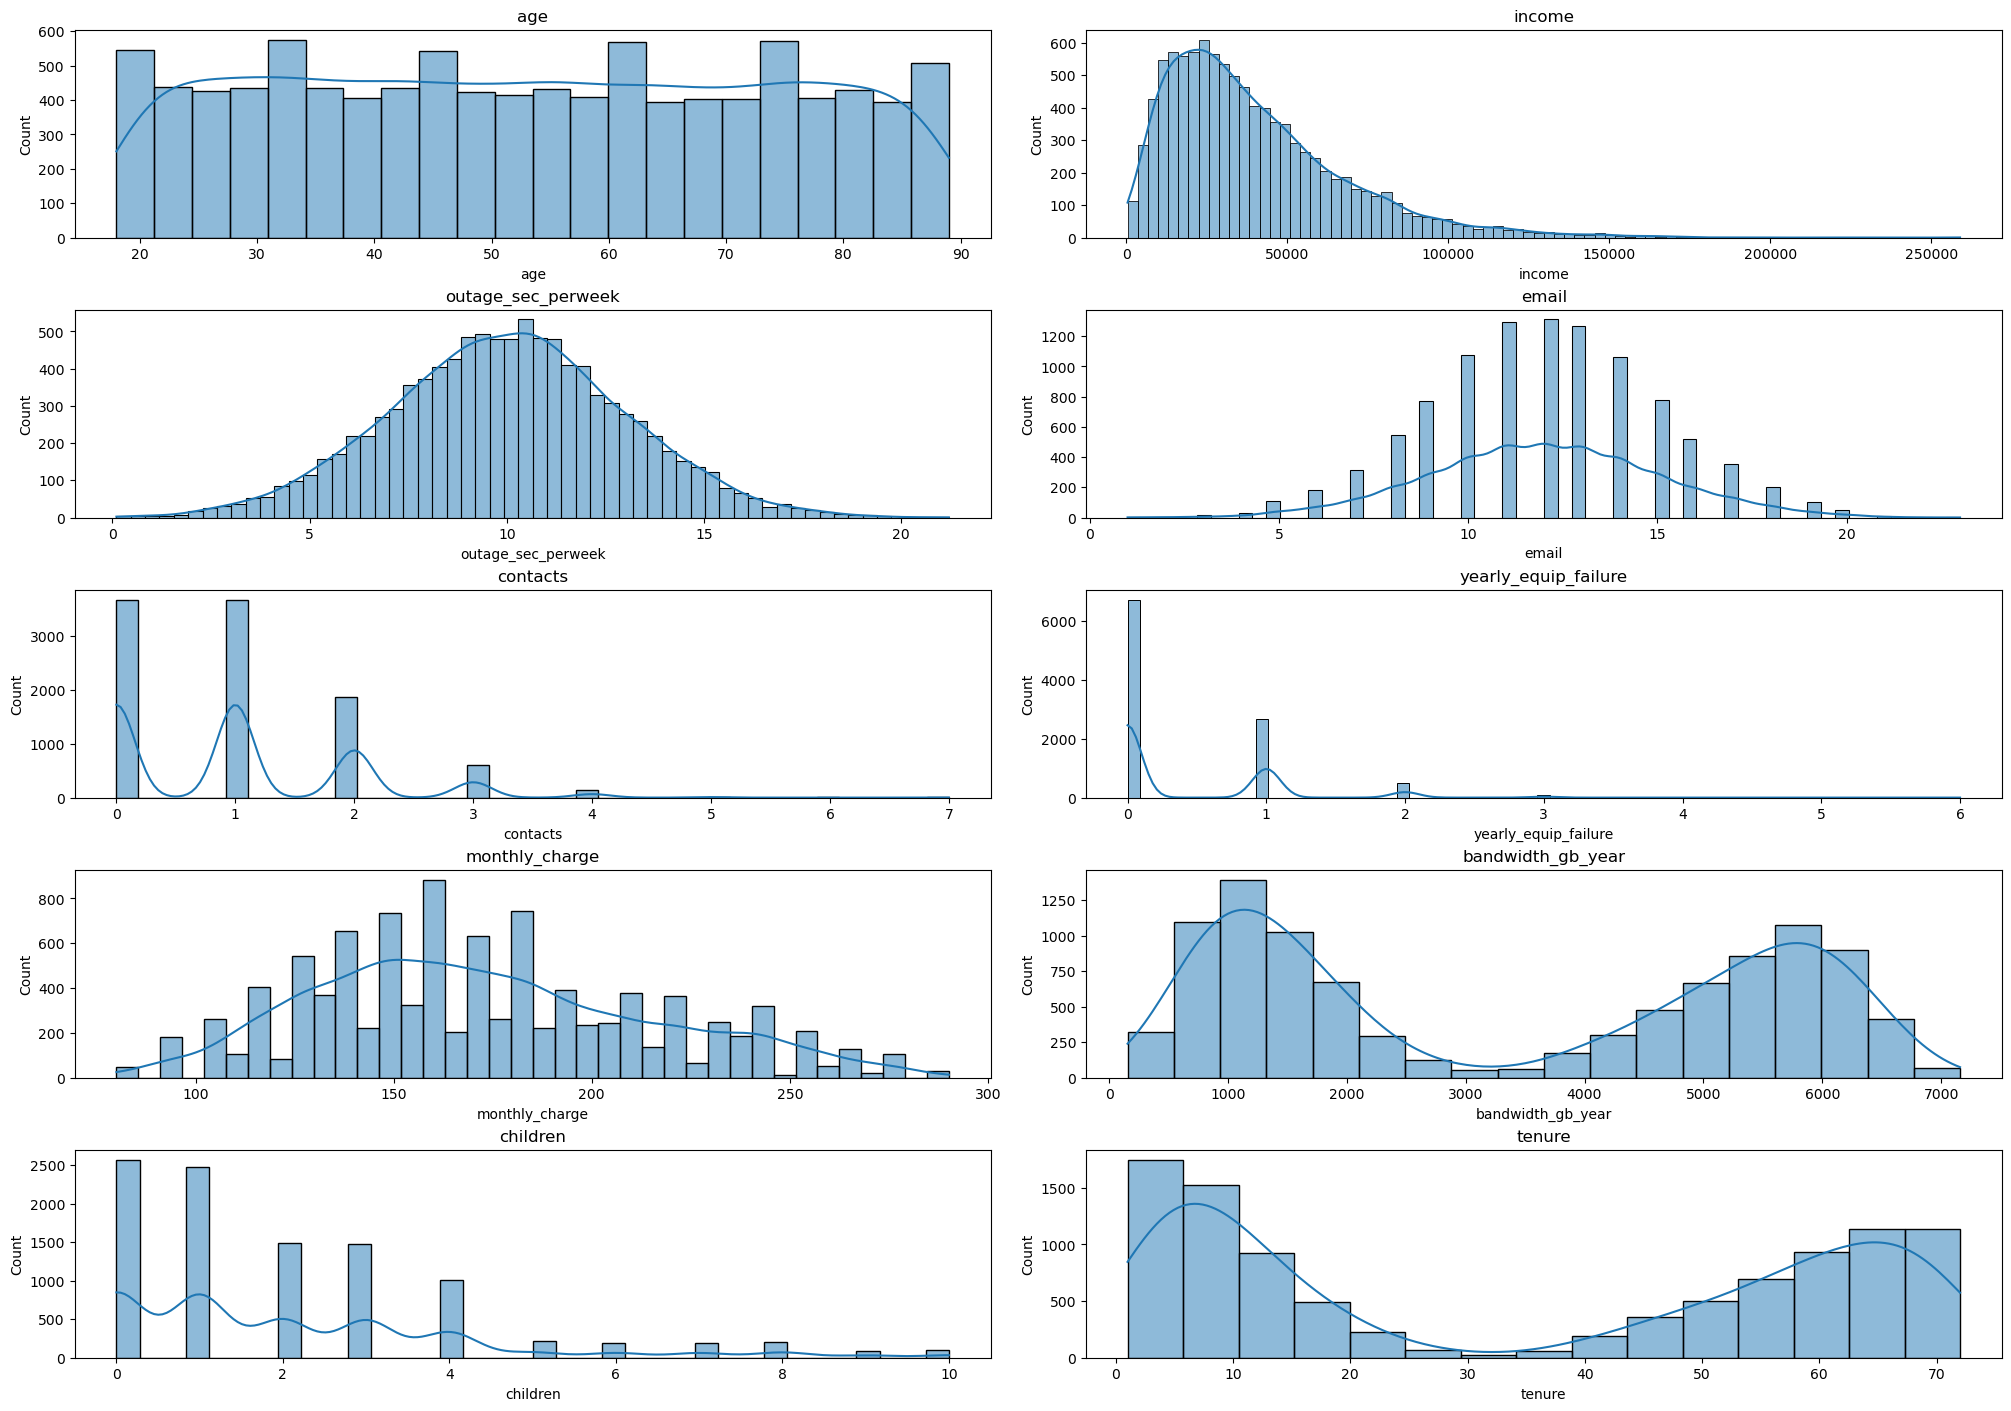

In [31]:
#Univariate histogram visualizations of quantitative variables
fig, axes = plt.subplots(5, 2, sharex=False, sharey=False, figsize=(20, 14), constrained_layout=True)

for col, ax in zip(df_quant.columns, axes.flat):
    sns.histplot(df_quant[col], ax=ax, kde=True) 
    ax.set_title(col)

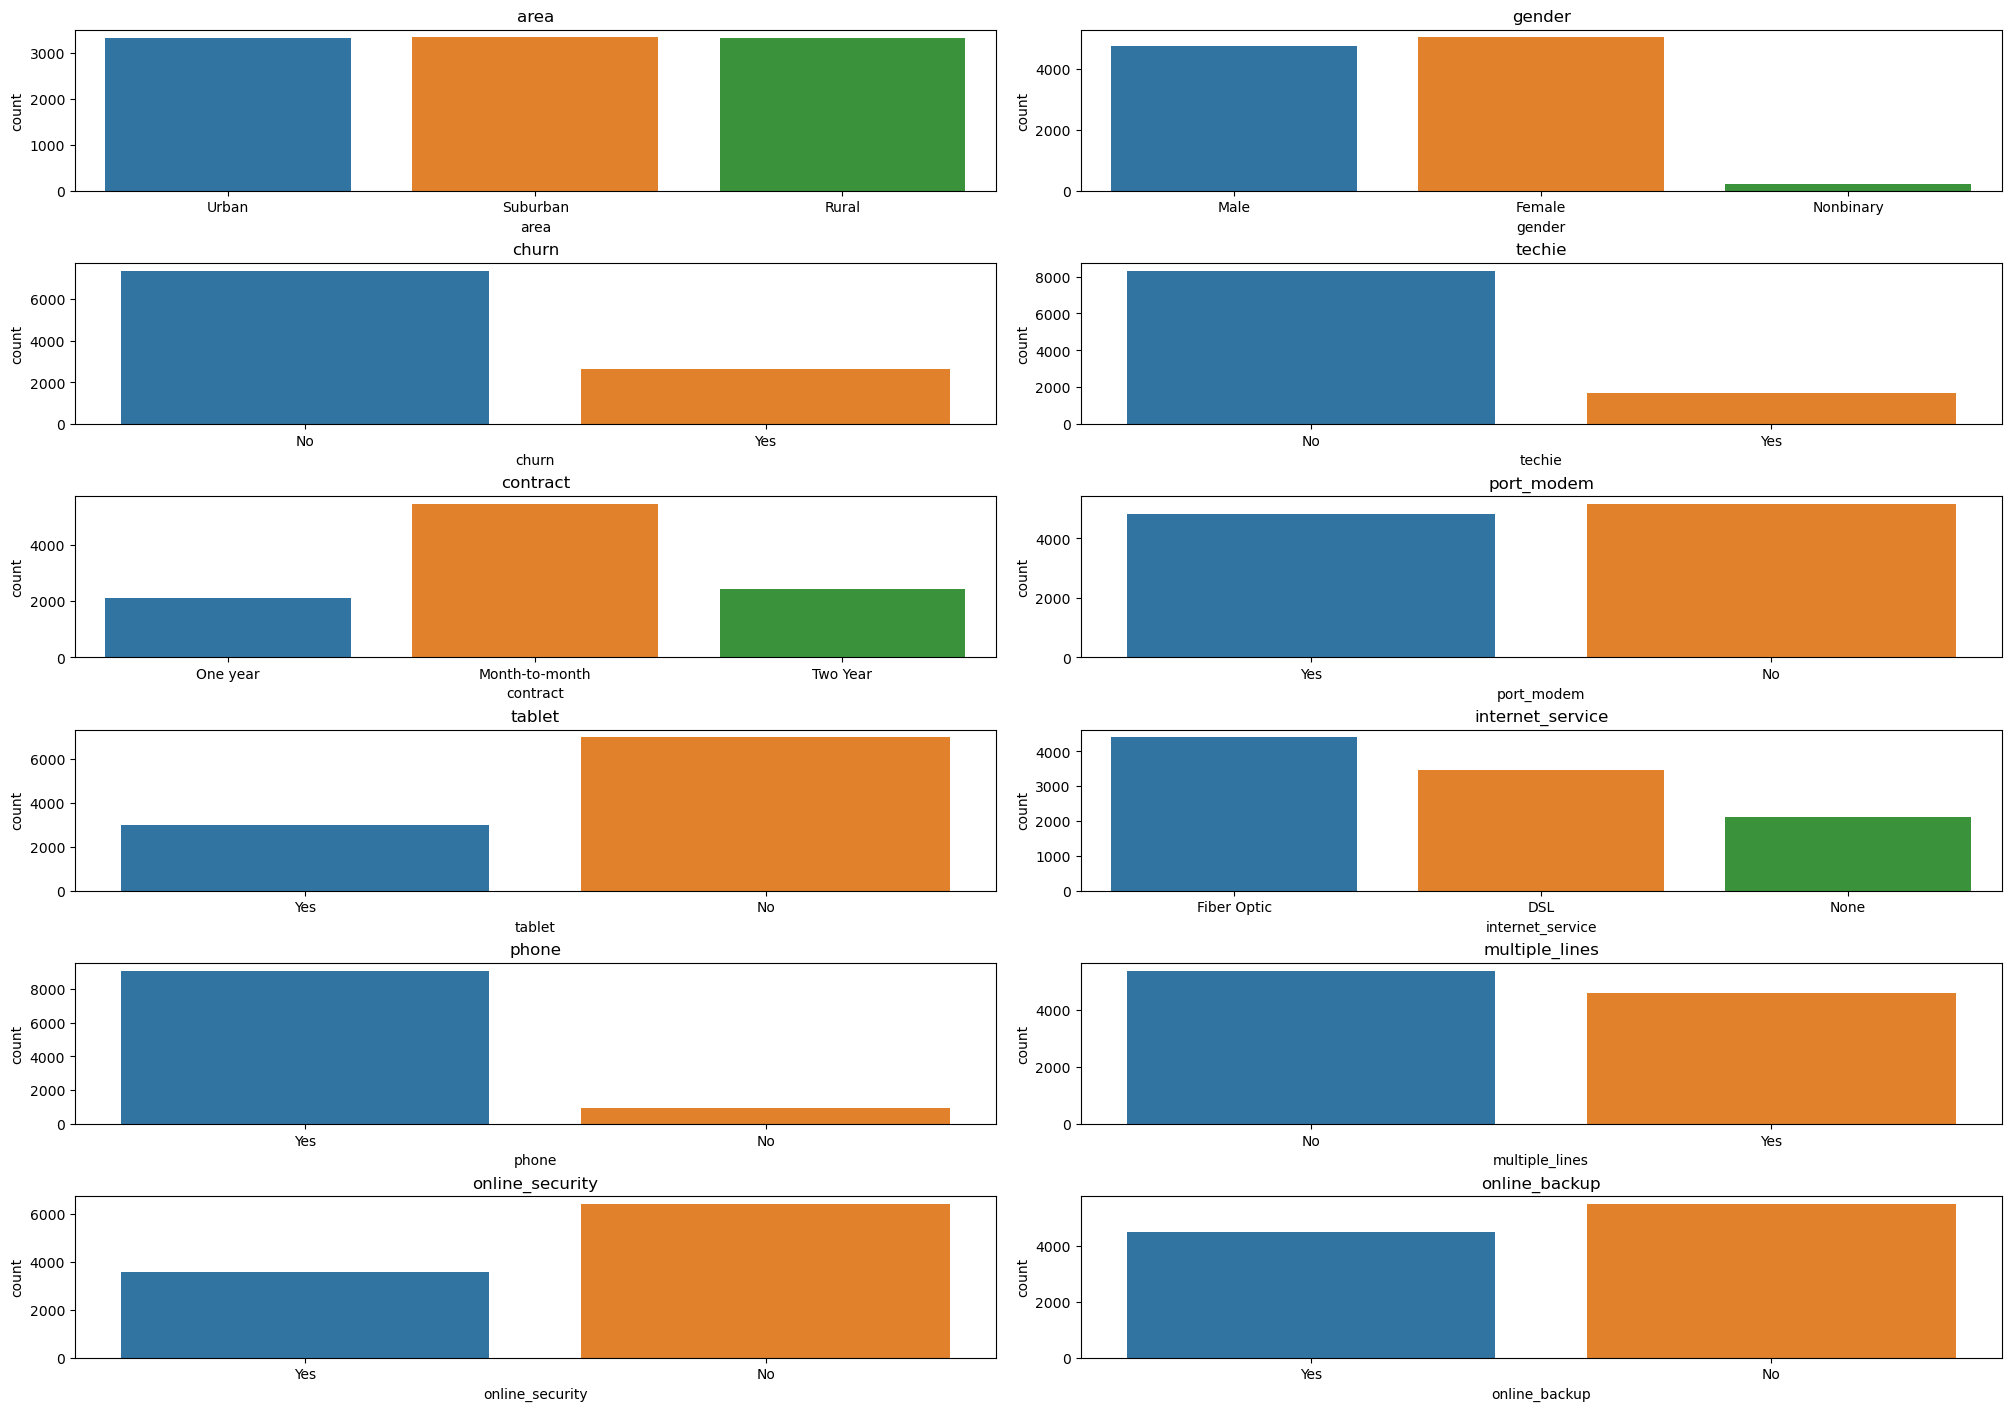

In [32]:
#Univariate histogram visualizations of categorical variables
fig, axes = plt.subplots(6, 2, sharex=False, sharey=False, figsize=(20, 14), constrained_layout=True)

for col, ax in zip(cat_col.columns, axes.flat):
    sns.countplot(data=cat_col, x=col, ax=ax)
    ax.set_title(col)

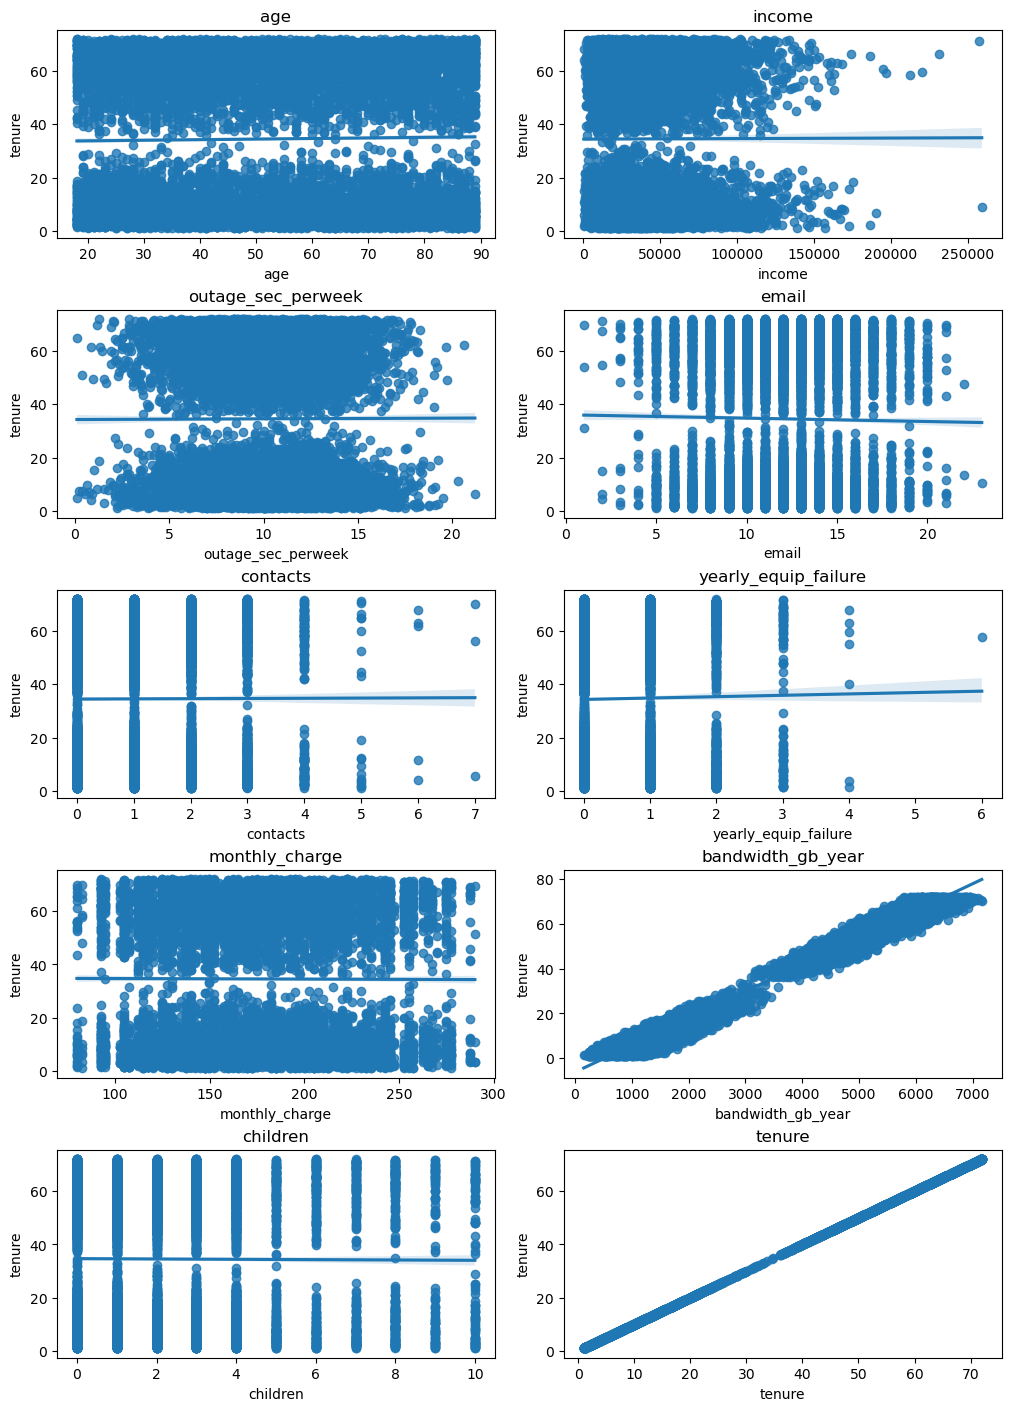

In [33]:
#Bivariate histogram visualizations of quantitative variables 
fig, axes = plt.subplots(5, 2, sharex=False, sharey=False, figsize=(10, 14), constrained_layout=True)

for col, ax in zip(df_quant.columns, axes.flat):
    sns.regplot(x=df_quant[col], y=df['tenure'], ax=ax) 
    ax.set_title(col)

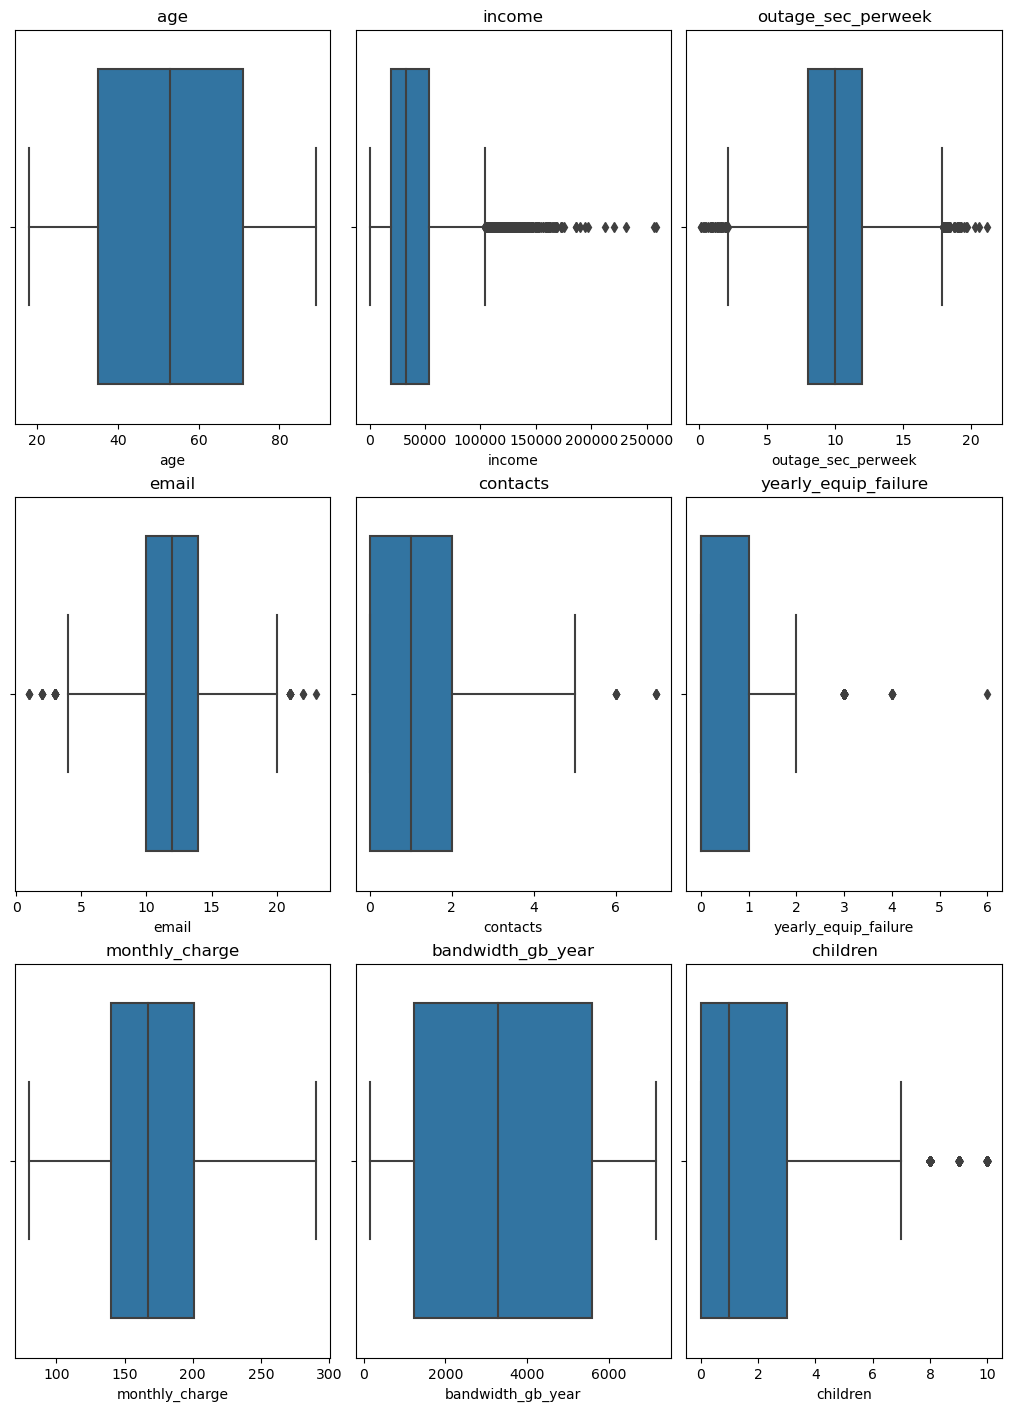

In [34]:
#Checking for outliers in the dataset using boxplot visualization
fig, axes = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(10, 14), constrained_layout=True)

for col, ax in zip(df_quant, axes.flat):
    if col != 'tenure':
        sns.boxplot(x=col, data=df, ax=ax)
        ax.set_title(col)
plt.show()

In [36]:
# Dropping variables not relevant to the model.

df = df.drop(columns =['area', 'gender',
       'outage_sec_perweek', 'email', 
       'contract', 'port_modem', 'tablet', 'internet_service',
       'phone', 'multiple_lines', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'payment_method', 'timely_response', 'timely_fixes',
       'timely_replacements', 'reliability', 'options', 'respectful_response',
       'courteous_exchange', 'active_listening'])

In [38]:
#provide copy of dataset to csv
df.to_csv('churn_data.csv')

In [39]:
cat_col.columns

Index(['area', 'gender', 'churn', 'techie', 'contract', 'port_modem', 'tablet',
       'internet_service', 'phone', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'payment_method'],
      dtype='object')

#### Part (IV) Model comparison and Analysis (Using Continous and Categorical variables)

(D1) using the predictor variables we identified in the other section, I created the first model with age and income serving as categorical variables. Based on the results of the model. From the results the r2 value of 0.989 shows that 98.9% of the variance in `tenure` is explained by these nine variables.

In [40]:
#Setting dependent variable
y = scaled_data['tenure']

#setting independent variables
X = scaled_data[['age','income','bandwidth_gb_year',
        'contacts','yearly_equip_failure', 
        'children', 'monthly_charge',
        'online_security','techie']].assign(const=1)
#regression model
model = sm.OLS(y,X)
model_result = model.fit()

model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 tenure   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.022e+05
Date:                Tue, 28 Nov 2023   Prob (F-statistic):               0.00
Time:                        18:49:53   Log-Likelihood:                 15538.
No. Observations:               10000   AIC:                        -3.106e+04
Df Residuals:                    9990   BIC:                        -3.098e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
age                      0.0269      0.001     30.145      0.000       0.025       0.029
income                  -0.0009      0.001     -1.408      0.159      -0.002       0.000
bandwidth_gb_year        0.9796      0.001    958.919      0.000       0.978       0.982
contacts                -0.0011      0.001     -1.092      0.275      -0.003       0.001
yearly_equip_failure    -0.0002      0.001     -0.299      0.765      -0.002       0.001
children                -0.0208      0.001    -29.085      0.000      -0.022      -0.019
monthly_charge          -0.0443      0.001    -61.026      0.000      -0.046      -0.043
online_security         -0.0153      0.001    -14.302      0.000      -0.017      -0.013
techie                  -0.0005      0.001     -0.335      0.738      -0.003       0.002
const                   -0.0252      0.001    -31.213      0.000      -0.027      -0.024
==============================================================================
Omnibus:                    16969.729   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              992.224
Skew:                          -0.447   Prob(JB):                    3.48e-216
Kurtosis:                       1.742   Cond. No.                         3.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Justification of Model Reduction

In [41]:
#Using forward selection to get most statistically significant features
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features)
        
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
            
        min_p_value = new_pval.min()
        
        if min_p_value < significance_level:
            best_features.append(new_pval.idxmin())
        else:
            break
    
    return best_features

selected_features = forward_selection(X, y)
print("Selected features:", selected_features)

Selected features: ['bandwidth_gb_year', 'monthly_charge', 'const', 'age', 'children', 'online_security']


Features with p values less than the alpha of 0.05 were kept. 

In [42]:
# calculating residual standard error

residuals = model_result.resid
residual_std_error = np.std(residuals)

print("Inital model Residual standard error:", residual_std_error)

Inital model Residual standard error: 0.05116333420138741


#### Part V

In [43]:
#### reduced model comparison and Analysis 

#Setting dependent variable
y = scaled_data['tenure']
X = scaled_data[['bandwidth_gb_year', 'monthly_charge', 'age', 'children', 'online_security']]

# adding constant to independent variables
X = sm.add_constant(X)

# fitting the linear regression model
reduced_model = sm.OLS(y, X)
reduced_results = reduced_model.fit()

# results summary
reduced_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 tenure   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.840e+05
Date:                Tue, 28 Nov 2023   Prob (F-statistic):               0.00
Time:                        18:49:53   Log-Likelihood:                 15536.
No. Observations:               10000   AIC:                        -3.106e+04
Df Residuals:                    9994   BIC:                        -3.102e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0256      0.001    -37.073      0.000      -0.027      -0.024
bandwidth_gb_year     0.9796      0.001    959.072      0.000       0.978       0.982
monthly_charge       -0.0443      0.001    -61.032      0.000      -0.046      -0.043
age                   0.0269      0.001     30.141      0.000       0.025       0.029
children             -0.0208      0.001    -29.086      0.000      -0.022      -0.019
online_security      -0.0153      0.001    -14.295      0.000      -0.017      -0.013
==============================================================================
Omnibus:                    17476.814   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              993.985
Skew:                          -0.446   Prob(JB):                    1.44e-216
Kurtosis:                       1.739   Cond. No.                         2.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# calculating residual standard error (E2)

reduced_residuals = reduced_results.resid
reduced_std_error = np.std(reduced_residuals)

print("Reduced model residual standard error:", reduced_std_error)

Reduced model residual standard error: 0.05117201332400162


#### Residual Plot

---

#### (E1) Model Comparison

Both our inital model and reduced model have high F-statistics which shows that both of our models are statistically significant. Looking at the AIC scores which indicate if the model is a good fit or not we can see that both models have the same score and the can infer that the lower AIC scores indicate a good fit. Overall I believe that the reduced model is better than the inital model due to it being able to return similar scores with less predictor variables.

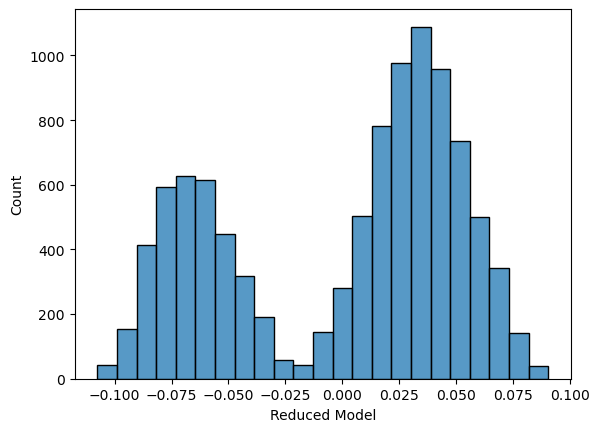

In [45]:
#Initial model residual plot
ax = sns.histplot(x=reduced_results.resid)
ax.set(xlabel='Reduced Model')
plt.show()

In [46]:
reduced_results.params

const               -0.025580
bandwidth_gb_year    0.979582
monthly_charge      -0.044336
age                  0.026853
children            -0.020820
online_security     -0.015288
dtype: float64

In [47]:
# whites test for heteroscedasticity
from statsmodels.stats.diagnostic import het_white

whites_test = het_white(reduced_results.resid, reduced_results.model.exog)

print("White Test p-value:", whites_test[1])

White Test p-value: 5.361865700330628e-42


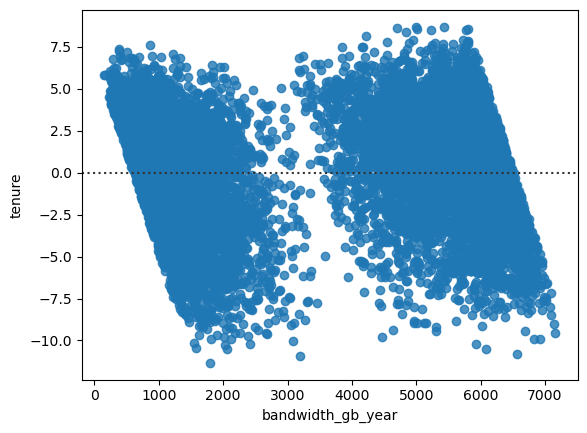

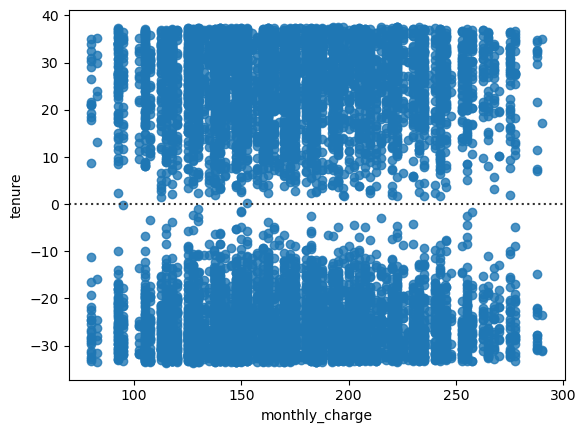

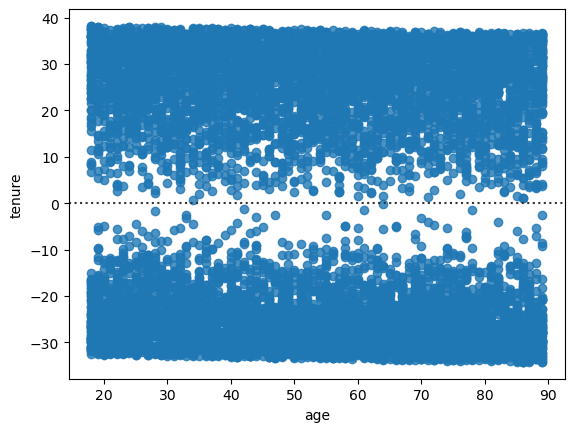

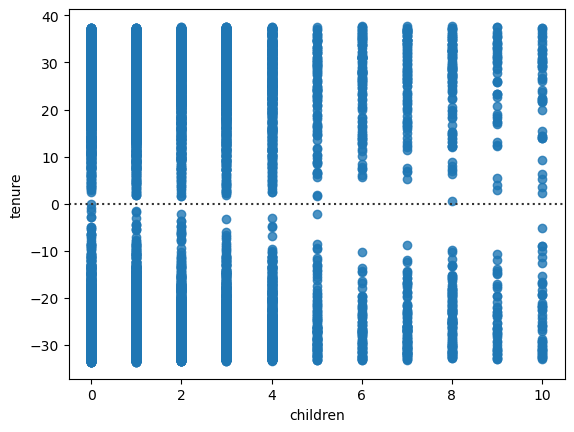

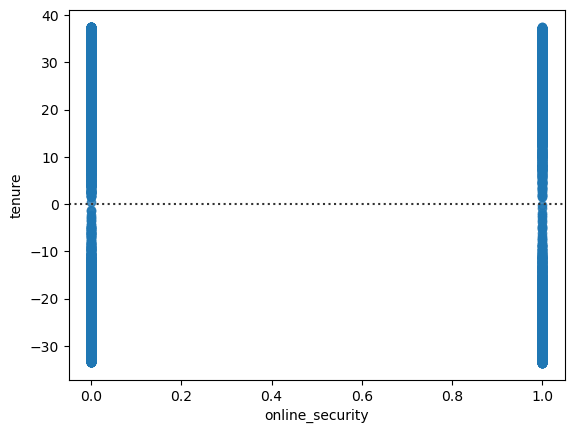

In [48]:
# using residual plot to visualize risk of heteroscedacity
for val in X:
    if val == 'const':
        pass
    else:
        sns.residplot(x=val, y='tenure', data=df)
        plt.show()

#### Results of White's test for heteroscedasticity

The p-value from the reduced model is < 0.05 which means that heteroscedasticity is present and based on this we must reject the null hypothesis. Moreover all of the reduced predictor variables are statistically significant in predicting customer tenure. We also see that the f statistic of 0.00 further proves that the reduced model as a whole is statistically significant.

#### Regression Equation (F1)

Y = B0 + B1X1 + B2X2 + B3X3 + ... + BnXn

Tenure = -0.0256 + (0.9796 * bandwidth_gb_year) - (0.0443 * monthly_charge) + (0.0269 * age) - (0.0208 * children) - (0.0153 * online_security)

Based on the equation the `constant` represents the estimated value of `tenure` when all the other predictors are zero. For every increase in `age` the tenure is expected to increase by 0.0268 units, holding every other predictor constant. We could go onto suggest that older customers tend to stay with our service longer by 0.0314 units. Furthermore `bandwidth_gb_year` usage is expected to increase tenure by 0.09795 units holding every other predictor constant. This is our strongest relationship in the dataset and can lead us to state confidently state that our highest bandwidth_gb_year customers are our longest tenured customers. Moreover it looks like `monthly_charge`, `children`, `online_security` each have negative relationships with tenure meaning that these predictors are associated with lower tenure.

#### Statistical significance of the model
Based on the reduced model. The high f-statistic 1.840e+05 and the low f-statistic probability 0.00 show that our model is statistically significant. The independent variables we chose of `age`, `monthly_charge`, `children`, `online_security` and `bandwidth_gb_year`show us that they are statistically significant in predicting customer tenure. Overall I believe this to be an extremely strong model based on the independent variables chosen.


#### Limitations of analysis
We are limted to 10,000 entries in our dataset. This limits our ability to isolate based on other factors such as focusing on a specific city that a customer lives in order to target certain bundles based on location. Through my inital exploration of the dataset itself I noticed a few odd things that could just be errors in customer submitted data and becuase no verification is required customers are allowed to enter whatever they see fit. Based on our current dataset 0.07% of our consumers are < 20 and have > 9 children. While this doesnt have any extreme consequences on our data there should be a verification process on some of the items entered.


#### Recommendations
Based on the analysis performed there are a few recommendations I have in order to increase customer tenure. We could start a targeted marketing campaign at customers who have more than x number of children. The x number would be the value at which we begin to see customers more likely to churn and start offering items in order to keep their business. Moreover for our customers who have higher monthly charges we would do the same thing. However further analysis would be required in order to find the number at which we begin to see churn becoming more impactful, but by adopting this strategy I am certain that over the long haul this would increase customer tenure.

## References 

9.2.3 - Assumptions for the SLR Model | STAT 500. (n.d.). Online.stat.psu.edu. Retrieved November 18, 2023, from https://online.stat.psu.edu/stat500/lesson/9/9.2/9.2.3#:~:text=Assumption%204%3A%20Equal%20Variances%20%2D%20The

‌

Real Python. (2019, April 15). Linear Regression in Python. Realpython.com; Real Python.
        https://realpython.com/linear-regression-in-python/

‌


Feature Selection using Wrapper Method - Python Implementation. (2020, October 24). Analytics Vidhya. https://www.analyticsvidhya.com/blog/2020/10/a-comprehensive-guide-to-feature-selection-using-wrapper-methods-in-python/

‌

## Panopto Recording
https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=7c02f0e7-d292-4ffb-aa41-b0c50164af9f